# Table of Contents for 6.2 Exploring Relationships
    Import Libraries
    Set Path, Import Files
    Data Cleaning
    Create a subset to explore
    Explore correlations between columns with numbers and non-ids
        Create a heatmap with matplotlib
        Update plot with labels and legend
    Create a correlation between freight, price, product dimensions
        Create a heatmap with labels
    Create scatterplots and pair scatterplots
    Create a categorical scatterplot
        Histogram -> Cap outliers -> Create columns of categories -> Plot    
    

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Check matplotlib version is higher than 3.3.3
matplotlib.__version__

'3.10.0'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# Set Path

In [4]:
path = r'C:\Users\valev\Desktop\Achievement 6\0625 Ecommnerce Brazil'

# Import Files

In [5]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders.pkl' ))

# Data Cleaning
    Most data cleaning is a separate notebook "Dtypes" for quick reference

In [6]:
df.shape

(103056, 42)

In [7]:
df.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'serller_zip_code_prefix', 'order_deliverd_carrier_date',
       'ordered_deliv

In [8]:
# Create a subset excluding ID columns, dates, object dtypes or product dimensions/category
sub = df[['payment_sequential', 'payment_installments', 'payment_value', 'price', 'freight_value']]

# Explore Correlations

In [9]:
# Create a correlation matrix using pandas

sub.corr()

payment_sequential  payment_installments  payment_value  \
payment_sequential              1.000000             -0.085918      -0.069420   
payment_installments           -0.085918              1.000000       0.331987   
payment_value                  -0.069420              0.331987       1.000000   
price                           0.007954              0.308575       0.895053   
freight_value                   0.028703              0.202756       0.446152   

                         price  freight_value  
payment_sequential    0.007954       0.028703  
payment_installments  0.308575       0.202756  
payment_value         0.895053       0.446152  
price                 1.000000       0.423802  
freight_value         0.423802       1.000000

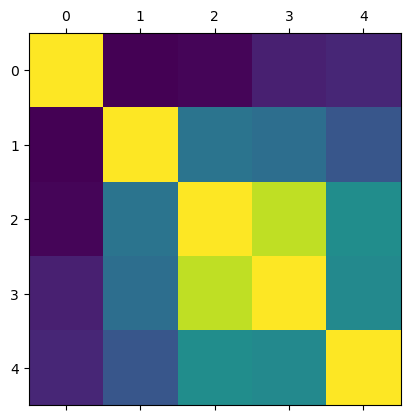

In [10]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

In [13]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\valev\\Desktop\\Achievement 6\\0625 Ecommnerce Brazil\\03 Scripts'

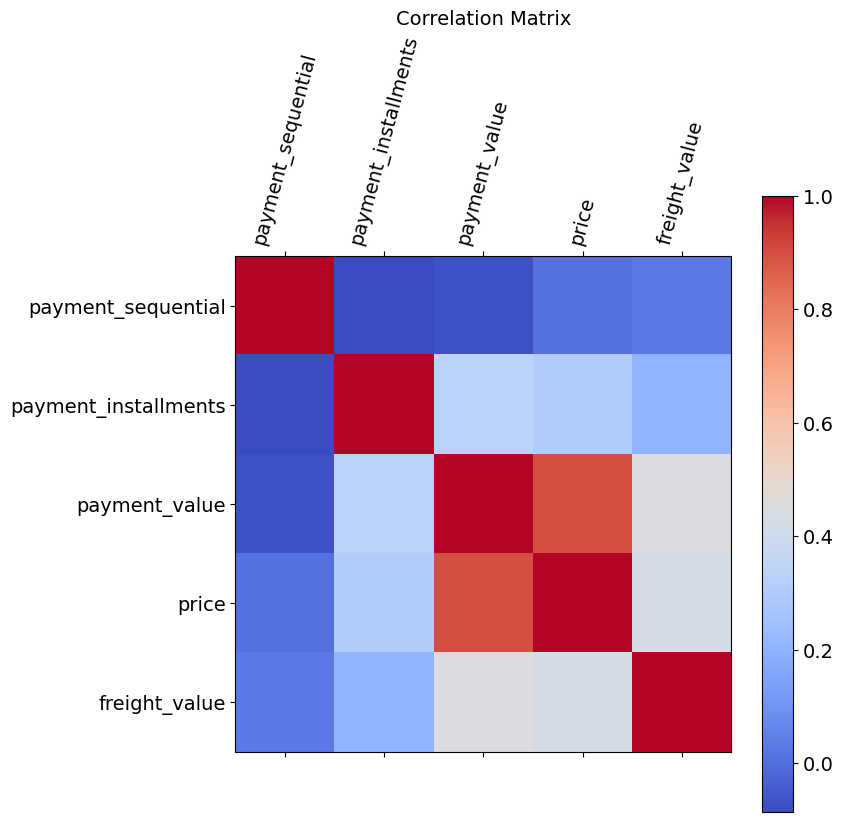

In [14]:
# Add labels, a legend, and change the size of the heatmap

corr = sub.corr()
f = plt.figure(figsize=(8, 8))
ax = f.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm')

plt.xticks(range(corr.shape[1]), corr.columns, fontsize=14, rotation=75)
plt.yticks(range(corr.shape[0]), corr.columns, fontsize=14)

cb = plt.colorbar(cax)
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=14)
plt.show()


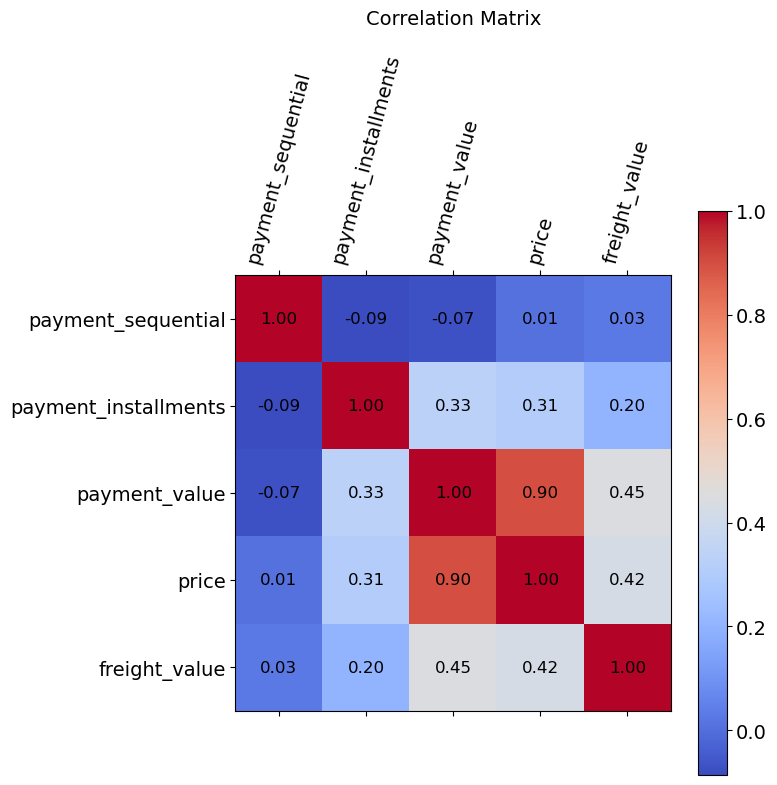

In [15]:

# Calculate the correlation matrix
corr = sub.corr()

# Create the figure and axes
f = plt.figure(figsize=(8, 8))
ax = f.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm')

# Add axis labels
plt.xticks(range(corr.shape[1]), corr.columns, fontsize=14, rotation=75)
plt.yticks(range(corr.shape[0]), corr.columns, fontsize=14)

# Add colorbar
cb = plt.colorbar(cax)
cb.ax.tick_params(labelsize=14)

# Add the correlation values inside each square
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black', fontsize=12)

# Add title
plt.title('Correlation Matrix', fontsize=14, pad=20)

plt.tight_layout()
plt.show()


### From the file I know that the payment_value is the combination of price and freight_value.  Having a stronger correlation of price and payment_value (0.90) is expected.  The freight_value has a correlationof 0.42 to price. I expected this to be less unless the price goes up with weight for example.  Should explore this next.  
### Payment_sequential is not a column I will need. Not noted here, but it only increases when a voucher was used, therefore will be exluded. 
### I expected to see payment_installments correlated with a higher price but this is not the case (0.31).


## Create a correlation between freight, price, product dimensions

In [16]:
subfreight = df[['price', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]

In [17]:
subfreight

price  freight_value  product_weight_g  product_length_cm  \
0        79.800003      19.530001               800                 17   
1        17.000000       7.390000               150                 16   
2        56.990002       8.720000               250                 20   
3        89.900002      17.879999              1200                 44   
4       113.570000      14.880000               835                 40   
...            ...            ...               ...                ...   
103881  297.000000      66.309998             13450                 95   
103882   79.000000      17.799999              7000                 60   
103883   39.990002       7.780000               120                 16   
103884  349.000000      20.540001               500                 22   
103885  169.899994      21.680000              2350                 33   

        product_height_cm  product_width_cm  
0                      27                17  
1                       6                11  
2                       8                21  
3                       2                35  
4                       9                33  
...                   ...               ...  
103881                 30                20  
103882                 20                30  
103883                  8                11  
103884                  6                16  
103885                  7                39  

[103056 rows x 6 columns]

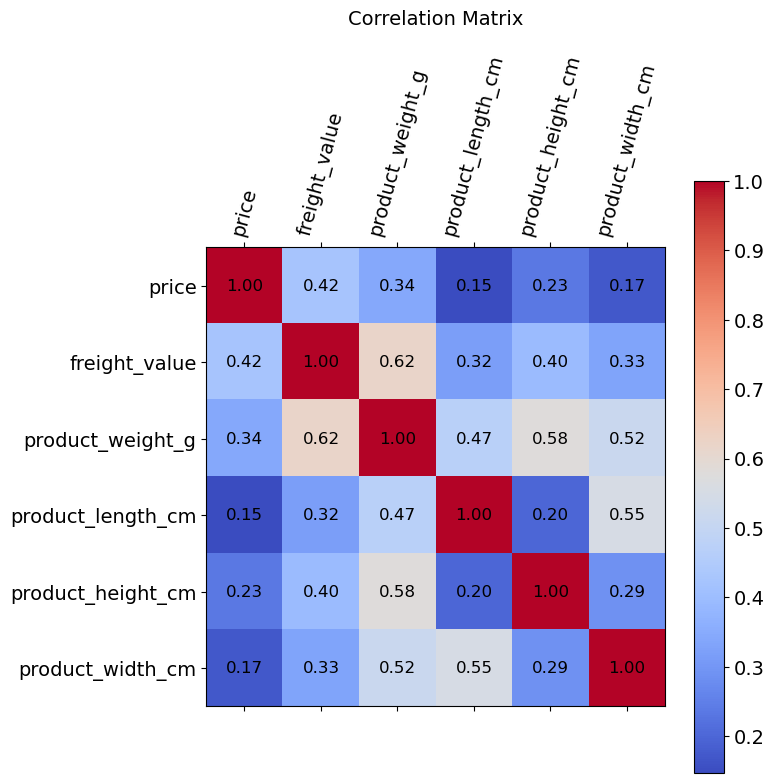

In [25]:

# Calculate the correlation matrix
corr1 = subfreight.corr()

# Create the figure and axes
f1 = plt.figure(figsize=(8, 8))
ax1 = f1.add_subplot(111)
cax1 = ax1.matshow(corr1, cmap='coolwarm')

# Add axis labels
plt.xticks(range(corr1.shape[1]), corr1.columns, fontsize=14, rotation=75)
plt.yticks(range(corr1.shape[0]), corr1.columns, fontsize=14)

# Add colorbar
cb1 = plt.colorbar(cax1)
cb1.ax.tick_params(labelsize=14)

# Add correlation values in each square
for (i, j), val in np.ndenumerate(corr1.values):
    ax1.text(j, i, f'{val:.2f}', ha='center', va='center', color='black', fontsize=12)

# Add title
plt.title('Correlation Matrix', fontsize=14, pad=20)

plt.tight_layout()
plt.show()


### As expected the freight_value would increase as weight increases (0.62).  The other correlaction is that weight would increase with product_height (0.58). 
### Increasing weight does not necessarily correlate with increased price (0.34)

# Scatterplots:

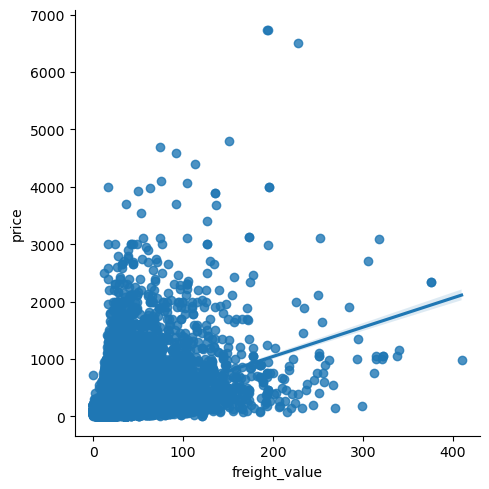

In [19]:
# Create a scatterplot for freight_value and price columns in seaborn

sns.lmplot(x = 'freight_value', y = 'price', data = df)
plt.show()

In [20]:
# Keep only the variables you want to use in the pair plot

sub_2 = df[['freight_value', 'price', 'product_weight_g', 'product_height_cm']]

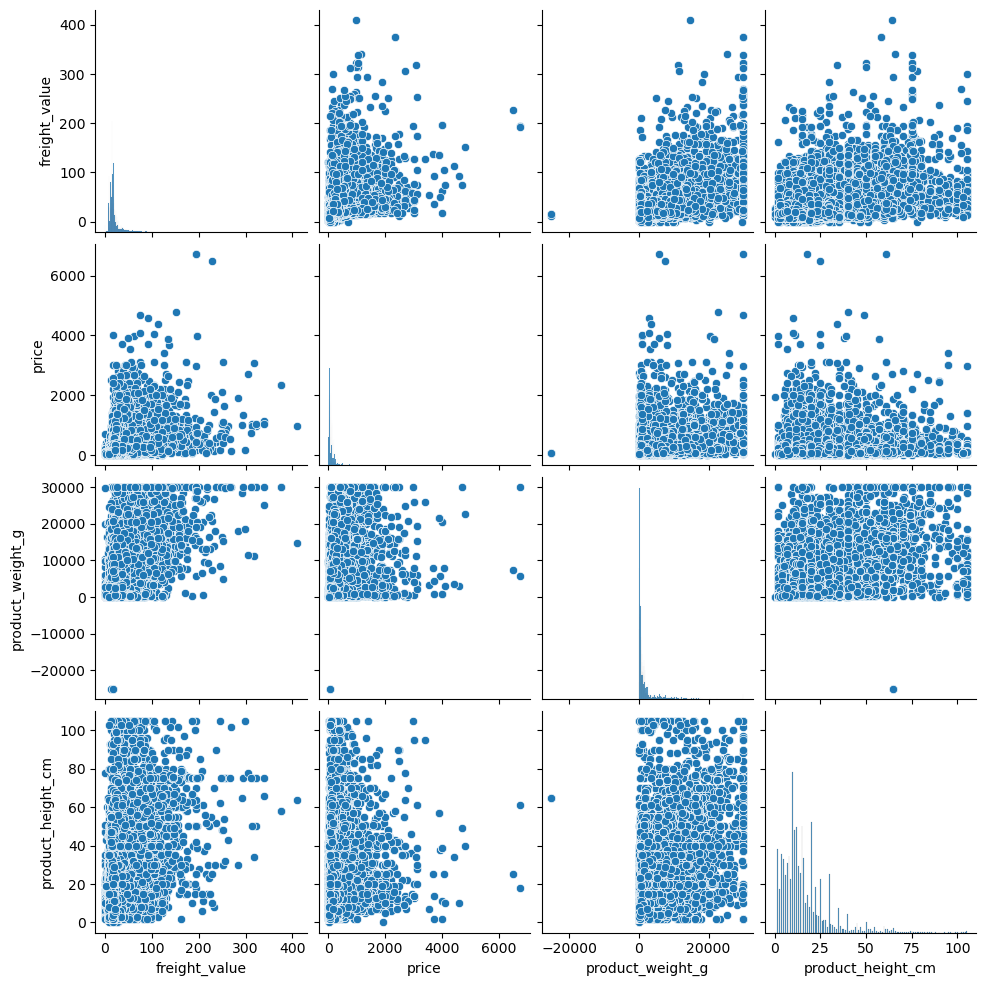

In [21]:
# Create a pair plot 

g = sns.pairplot(sub_2)
plt.show()

## The freight_value does increase slightly with price but none other scatterplot has any defined relationship

# I do see negative figures plotted but I am unable to find them in the actual file

# Categorical Plot

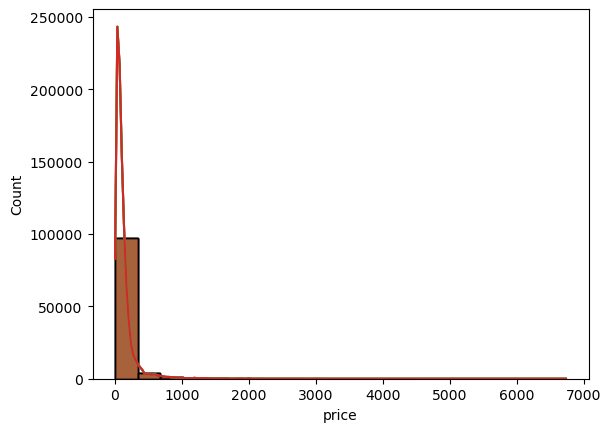

In [29]:
# Create a histogram for "price"
sns.histplot(df['price'], bins = 20, kde = True)
plt.show()

## It appears that the expensive items are houseware, small appliances, art.  Some of these would be heavy or need extra packaging which would increase freight cost.   However, I would like to focus on the bulk of prices. 

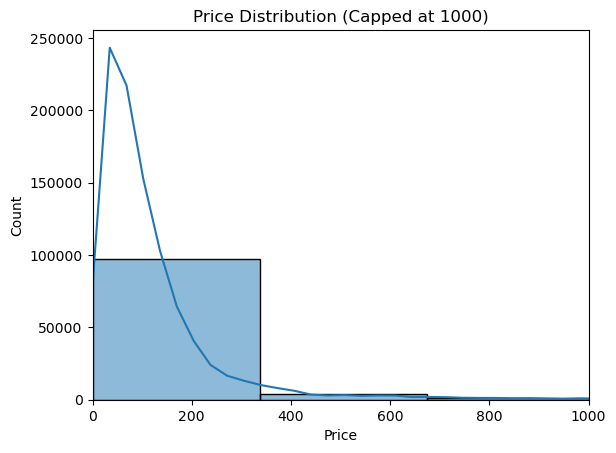

In [34]:
# Cap the x-asis to 1000
sns.histplot(df['price'], bins=20, kde=True)
plt.xlim(0, 1000)  # Set lower and upper x-axis limit
plt.title('Price Distribution (Capped at 1000)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [35]:
df.loc[df['price'] < 350, 'Price category'] = 'Low price'

In [36]:
df.loc[(df['price'] >= 350) & (df['price'] < 1000), 'Price category'] = 'Middle price'

In [37]:
df.loc[df['price'] >= 1000, 'Price category'] = 'High price'

In [38]:
df['Price category'].value_counts(dropna = False)

Price category
Low price       97572
Middle price     4624
High price        860
Name: count, dtype: int64

C:\Users\valev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


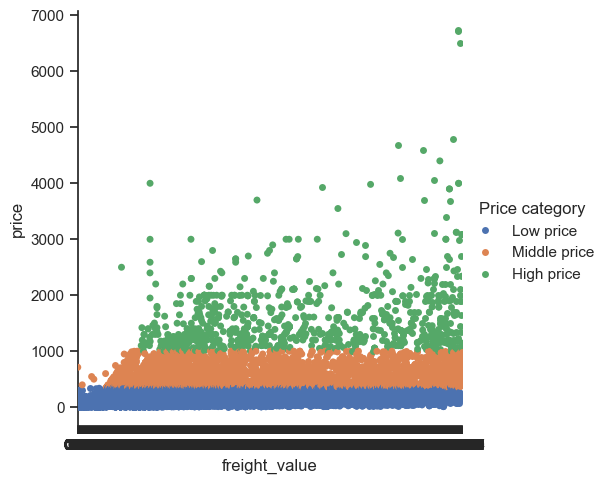

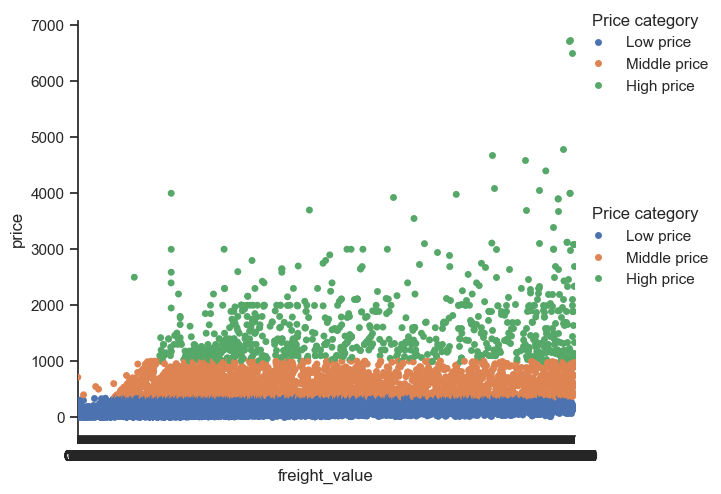

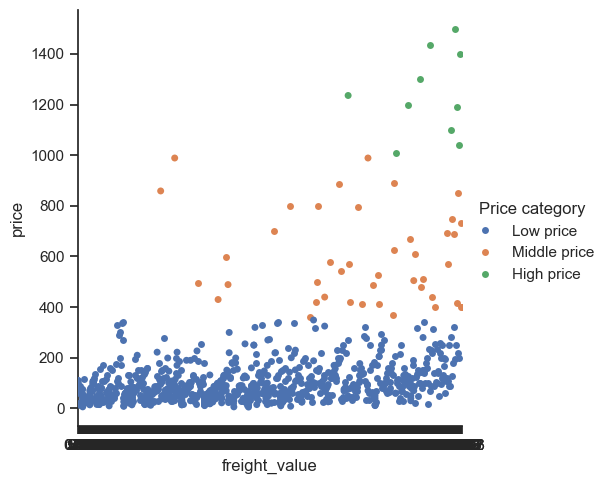

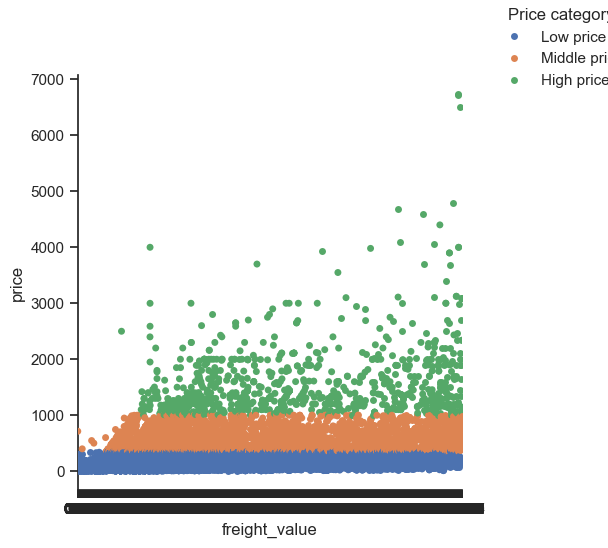

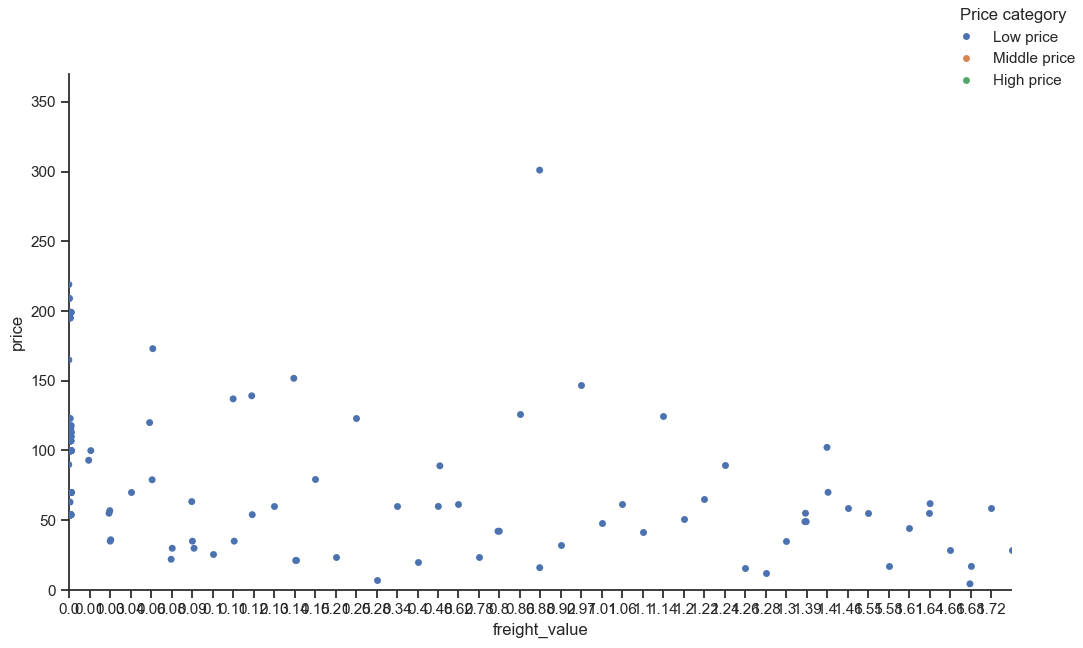

In [43]:
# Set the style
sns.set(style="ticks")

# Create the categorical plot
g = sns.catplot(
    x="freight_value", 
    y="price", 
    hue="Price category", 
    data=df, 
    kind="strip",  # or "box", "violin", "swarm"
    height=6, aspect=1.5
)

# Tidy up the legend
g._legend.set_title("Price category")
g._legend.set_bbox_to_anchor((1.05, 1))  # Move outside the plot

# Improve axis limits if needed
plt.xlim(0, df['freight_value'].quantile(0.95))  # Cut off extreme outliers
plt.ylim(0, df['price'].quantile(0.95))

plt.tight_layout()
plt.show()



## After fighting error codes the above was plotted.   I knew it wasn't going to tell me anything new, just needed to complete it for the lesson. 

# Questions answered:
    None of my questions were answered through this excercise.  